In [158]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn

%matplotlib inline

In [2]:
glaucoma_dataset = pd.read_csv('Datasets/GlaucomaM_with_labels.csv')

In [3]:
glaucoma_dataset

,area global,area temporal,area superior,area nasal,area inferior,effective area global,effective area temporal,effective area superior,effective area nasal,effective area inferior,...,third moment temporal,third moment superior,third moment nasal,third moment inferior,mean radius,retinal nerve fiber thickness,mean depth in contour,effective mean depth,mean variability,Class
0,2.220,0.354,0.580,0.686,0.601,1.267,0.336,0.346,0.255,0.331,...,-0.018,-0.230,-0.510,-0.158,0.841,0.410,0.137,0.239,0.035,normal
1,2.681,0.475,0.672,0.868,0.667,2.053,0.440,0.520,0.639,0.454,...,-0.014,-0.165,-0.317,-0.192,0.924,0.256,0.252,0.329,0.022,normal
2,1.979,0.343,0.508,0.624,0.504,1.200,0.299,0.396,0.259,0.246,...,-0.097,-0.235,-0.337,-0.020,0.795,0.378,0.152,0.250,0.029,normal
3,1.747,0.269,0.476,0.525,0.476,0.612,0.147,0.017,0.044,0.405,...,-0.035,-0.449,-0.217,-0.091,0.746,0.200,0.027,0.078,0.023,normal
4,2.990,0.599,0.686,1.039,0.667,2.513,0.543,0.607,0.871,0.492,...,-0.105,0.084,-0.012,-0.054,0.977,0.193,0.297,0.354,0.034,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2.801,0.481,0.729,0.888,0.704,1.841,0.312,0.550,0.583,0.396,...,-0.180,-0.224,-0.085,-0.006,0.945,0.121,0.182,0.276,0.033,glaucoma
192,1.698,0.265,0.449,0.530,0.454,1.128,0.211,0.281,0.286,0.351,...,-0.137,-0.209,-0.289,0.043,0.736,0.273,0.207,0.312,0.036,glaucoma
193,2.124,0.402,0.514,0.697,0.511,1.595,0.369,0.430,0.323,0.473,...,-0.071,-0.048,-0.278,0.048,0.823,0.088,0.174,0.231,0.028,glaucoma
194,2.039,0.374,0.491,0.675,0.500,1.561,0.362,0.397,0.316,0.485,...,0.187,0.026,-0.126,0.167,0.808,0.010,0.272,0.355,0.023,glaucoma


In [5]:
features = list(glaucoma_dataset.columns)[:-1]
features

['area global',
 'area temporal',
 'area superior',
 'area nasal',
 'area inferior',
 'effective area global',
 'effective area temporal',
 'effective area superior',
 'effective area nasal',
 'effective area inferior',
 'area below reference global',
 'area below reference temporal',
 'area below reference superior',
 'area below reference nasal',
 'area below reference inferior',
 'height in contour',
 'mean height contour global',
 'mean height contour temporal',
 'mean height contour superior',
 'mean height contour nasal',
 'mean height contour inferior',
 'peak height contour',
 'peak height contour temporal',
 'peak height contour superior',
 'peak height contour nasal',
 'peak height contour inferior',
 'height variation contour',
 'volume below surface global',
 'volume below surface temporal',
 'volume below surface superior',
 'volume below surface nasal',
 'volume below surface inferior',
 'volume above surface global',
 'volume above surface temporal',
 'volume above surfa

In [6]:
# Feature dataframe
glaucoma_dataset[features].shape

(196, 62)

In [7]:
# Target dataframe
glaucoma_dataset[['Class']].shape

(196, 1)

In [39]:
# Train-validation-test split 80-10-10
X_train, X_val_test, y_train, y_val_test = train_test_split(glaucoma_dataset[features], glaucoma_dataset[['Class']], random_state=0, train_size=0.8, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, random_state=0, train_size=0.5, shuffle=True)

In [40]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (156, 62)
y_train shape: (156, 1)
X_val shape: (20, 62)
y_val shape: (20, 1)
X_test shape: (20, 62)
y_test shape: (20, 1)


In [41]:
# Dataframe describe function
glaucoma_dataset[features].describe()

,area global,area temporal,area superior,area nasal,area inferior,effective area global,effective area temporal,effective area superior,effective area nasal,effective area inferior,...,third moment global,third moment temporal,third moment superior,third moment nasal,third moment inferior,mean radius,retinal nerve fiber thickness,mean depth in contour,effective mean depth,mean variability
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,2.606531,0.458980,0.651781,0.835929,0.659995,1.874138,0.406372,0.486403,0.501214,0.480097,...,-0.092985,-0.004658,-0.039806,-0.147204,-0.036510,0.904985,0.182383,0.231270,0.308903,0.033541
std,0.659789,0.127013,0.158462,0.222166,0.161065,0.721218,0.125941,0.184486,0.286181,0.173977,...,0.108226,0.128062,0.150077,0.134205,0.136423,0.112356,0.094080,0.123882,0.128246,0.021850
min,1.312000,0.201000,0.345000,0.397000,0.369000,0.415000,0.137000,0.017000,0.008000,0.098000,...,-0.353000,-0.291000,-0.449000,-0.510000,-0.405000,0.647000,-0.297000,0.012000,0.047000,0.000000
25%,2.139250,0.370750,0.538500,0.681000,0.550500,1.309250,0.315750,0.380750,0.280500,0.372500,...,-0.161500,-0.101000,-0.135250,-0.231000,-0.127500,0.826000,0.119750,0.144000,0.230500,0.021000
50%,2.533000,0.444500,0.630500,0.808500,0.632000,1.843500,0.402500,0.468500,0.503500,0.484000,...,-0.081000,-0.018500,-0.031500,-0.146500,-0.036000,0.899500,0.182000,0.227000,0.298000,0.028000
75%,2.943500,0.528000,0.738250,0.952000,0.749750,2.317000,0.483250,0.605500,0.689500,0.594750,...,-0.025250,0.087750,0.068000,-0.056250,0.049500,0.968500,0.237000,0.299250,0.379250,0.038250
max,5.444000,0.967000,1.340000,1.765000,1.373000,4.125000,0.848000,1.225000,1.568000,0.961000,...,0.192000,0.366000,0.358000,0.245000,0.418000,1.317000,0.451000,0.663000,0.743000,0.183000


In [202]:
# Convert dataframe to np array
y_train = np.array(y_train).reshape(-1)
y_val = np.array(y_val).reshape(-1)
y_test = np.array(y_test).reshape(-1)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (156, 62)
y_train shape: (156,)
X_val shape: (20, 62)
y_val shape: (20,)
X_test shape: (20, 62)
y_test shape: (20,)


In [203]:
n_neighbors_params = [1,2,3,5,8,10,15,20,30]
trails = []

for n_neighbors in n_neighbors_params:
    
    # Initializing KNN
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Fit to training data
    knn.fit(X_train, y_train)

    # Training set prediction
    train_set_score = round(knn.score(X_train, y_train), 4)

    # Validation set prediction
    val_set_score = round(knn.score(X_val, y_val), 4)
    
    trails.append( {'No. of neighbors': n_neighbors,
                    'Train set score' : train_set_score,
                    'Validation set score':val_set_score} )
    
df = pd.DataFrame(trails)
df

,No. of neighbors,Train set score,Validation set score
0,1,1.0000,0.80
1,2,0.9167,0.85
2,3,0.9038,0.80
3,5,0.8782,0.80
4,8,0.8526,0.85
5,10,0.8590,0.80
6,15,0.8333,0.85
7,20,0.8013,0.75
8,30,0.7949,0.70


In [204]:
n_neighbors = 3

# Initializing KNN
knn = KNeighborsClassifier(n_neighbors = n_neighbors)

# Fit to training data
knn.fit(X_train, y_train)
print("n_neighors: {}".format(n_neighbors))

# Test set prediction
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))

n_neighors: 3
Test set score: 0.750


[Text(33.0, 0.5, 'Predicted label'), Text(0.5, 15.0, 'Actual label')]

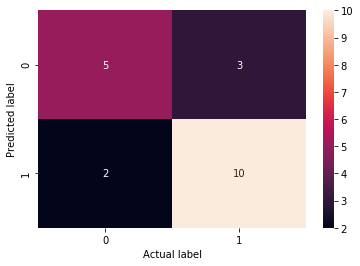

In [205]:
y_test_pred = knn.predict(X_test)

# Confusion Matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_pred, labels = None, sample_weight = None, normalize = None)

# Confusion Matrix heatmap
heatmap_test = sn.heatmap(confusion_matrix_test, annot=True)
heatmap_test.set(xlabel='Actual label', ylabel='Predicted label')